In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("bmh")
from numba import jit
from matplotlib.gridspec import GridSpec
from matplotlib import rc
rc('text', usetex=True)
from scipy import stats
from scipy.stats import beta as beta_stat
from scipy.stats import gamma
import time
SMALL_SIZE=15
MEDIUM_SIZE=20
rc('legend', fontsize=MEDIUM_SIZE)
rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=SMALL_SIZE)  
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821']

In [2]:
def afd_gamma(X_bar,beta):

    return gamma(beta,scale=X_bar/beta)

In [3]:
@jit
def simulate_SLM(x_0,sqrt_sig_tau,tau,K,N,nse,delta_t,delta_t_root):
     
    X = [x_0]
    
    for i in range(N):
        
        X_t = X[-1]
        
        X_t += (X_t/tau)*(1 - X_t/K)*delta_t + sqrt_sig_tau*X_t*nse[i]*delta_t_root
        
        if X_t < 0:
            X_t = 1e-6
            
        elif X_t > 1:
            X_t = 1-1e-6
        
        X.append(X_t)    
    
    return(X)

In [4]:
def loop_SLM(L,x_0_list,sqrt_sig_tau,tau,K,N_list,ns,delta_t,delta_t_root):
    
    X = []
    
    for i in range(L):
        
        x=simulate_SLM(x_0_list[i],sqrt_sig_tau,tau,K,N_list[i],ns.normal(0, 1, N_list[i]),delta_t,delta_t_root) 
        X.append(x)
    
    return(X)

0.5470032691955566

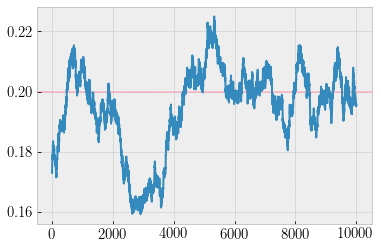

In [5]:
tau = 1
sgm = .01
sqrt_sig_tau = np.sqrt(sgm/tau)
K = .2
N = 10000
xbar=K*(1-sgm/2)
beta=(2/sgm) - 1
x_0 = afd_gamma(xbar,beta).rvs()
nse=np.random.normal(0,1,N)
delta_t=1.0/1000
delta_t_root = np.sqrt(delta_t)
t1 = time.time()
plt.plot(simulate_SLM(x_0,sqrt_sig_tau,tau,K,N,nse,delta_t,delta_t_root),zorder=10)
plt.axhline(K,color="pink",zorder=1)
t2 = time.time()
t2 - t1

In [6]:
L = 1000
x_0_list=afd_gamma(xbar,beta).rvs(L)
N_list=((1/delta_t)*np.random.randint(1,100,L)).astype(int)

In [7]:
ns=np.random.default_rng()
t1 = time.time()
X_obs = loop_SLM(L,x_0_list,sqrt_sig_tau,tau,K,N_list,ns,delta_t,delta_t_root)
t2 = time.time()
final_val = [x[-1] for x in X_obs]

In [8]:
t2 - t1

3.4139785766601562

Now, running simulations with actual dates

In [9]:
metadata = pd.read_csv("../metagenomic_scripts/metagenomic_data_files/Poyet_sample_metadata.csv",index_col=0,sep="\t")
metadata["collection_date"] = pd.to_datetime(metadata["collection_date"])

In [10]:
host = "ao"
metadata = metadata.loc[metadata["host"] == host]

In [11]:
spec_df = pd.read_csv(f"/u/scratch/r/rwolff/Poyet_midas_output/merged_midas_output/{host}_standard/species/relative_abundance.txt.bz2",sep="\t",index_col=0)
spec_df = spec_df[[s for s in metadata["collection_date"].index if s in spec_df.columns]]
species_name = "Bifidobacterium_bifidum_55065"
obs_sim_data = spec_df.loc[species_name].values
date_diffs = (metadata.loc[spec_df.columns,"collection_date"].diff())/ np.timedelta64(1,'D')
N_list = date_diffs.values[1:].astype(int)
Nt = len(N_list)
T = N_list.sum()
timepoints = np.insert(np.cumsum(N_list),0,0).astype(int)
spec_df

,SRR9224065,SRR9224066,SRR9224067,SRR9224068,SRR9224069,SRR9224070,SRR9224071,SRR9224072,SRR9224073,SRR9224074,...,SRR9224256,SRR9224255,SRR9224288,SRR9224253,SRR9224258,SRR9224257,SRR9224472,SRR9224473,SRR9224470,SRR9224471
species_id,,,,,,,,,,,,,,,,,,,,,
Yaniella_halotolerans_59132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thermodesulfovibrio_thiophilus_59110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bradyrhizobium_sp_59283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rhodopseudomonas_palustris_61217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Porphyromonas_sp_60792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Corynebacterium_callunae_58768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bacteroidales_bacterium_58650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Micrococcus_luteus_57785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
tl_df = pd.DataFrame([spec_df.T.mean(),spec_df.T.var()],columns = spec_df.index,index=["mean","variance"]).T

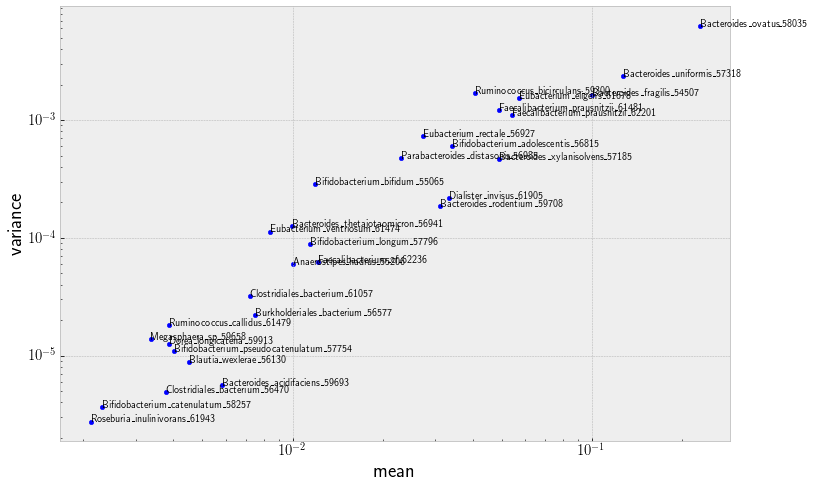

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
tl_df = pd.DataFrame([spec_df.T.mean(),spec_df.T.var()],columns = spec_df.index,index=["mean","variance"]).T

tl_df = tl_df.sort_values("mean").iloc[-30:]

tl_df.plot.scatter(x="mean",y="variance",ax=ax)

ax.loglog()

for k, v in tl_df.iterrows():
    ax.annotate(k, v)

In [ ]:
plt.plot([obs_sim_data[:i].mean() for i in range(2,len(obs_sim_data))])

In [ ]:
plt.plot([obs_sim_data[:i].std() for i in range(2,len(obs_sim_data))])

In [26]:
delta_t=1.0/1000
delta_t_root = np.sqrt(delta_t)

n = 30
obs_sim_data_firstn = obs_sim_data[:n]

xbar = obs_sim_data_firstn.mean()
sgm = obs_sim_data_firstn.std()

#xbar = 10*xbar
sgm = 100*sgm
K = xbar/(1- sgm/2)
tau=10
sqrt_sig_tau = np.sqrt(sgm/tau)
beta=(2/sgm) - 1

x_0 = afd_gamma(xbar,beta).rvs()


In [27]:
beta

2.039365894674367

In [28]:
nse=np.random.normal(0,1,int(T/delta_t))
inst_data=np.array(simulate_SLM(x_0,sqrt_sig_tau,tau,K,int(T/delta_t),nse,delta_t,delta_t_root))
sim_data=inst_data[::int(1/delta_t)]
obs_sim_data=sim_data[timepoints]

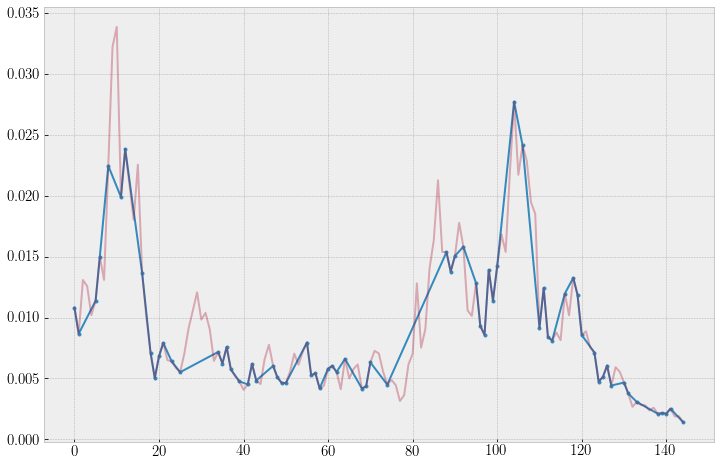

In [29]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(timepoints,obs_sim_data,".-")
ax.plot(sim_data,alpha=.3);

In [30]:
ns=np.random.default_rng()
t1 = time.time()
X_list = []

test_sim_list = []

M = int(Nt/5)
num_reps = 10

p = []
for _ in range(100):
    
    test_sim_list = []
    
    for __ in range(M):
        
        X = loop_SLM(len(N_list),obs_sim_data,sqrt_sig_tau,tau,K,(N_list/delta_t).astype(int) - 1,ns,delta_t,delta_t_root)
        #X_list.append(X)
        test_sim = np.array([x[-1] for x in X])
        test_sim = np.insert(test_sim,0,afd_gamma(xbar,beta).rvs())
        test_sim_list.append(test_sim)
        
    I = 1*(pd.DataFrame(test_sim_list) < obs_sim_data).sum()
    I += 1
    Omq = np.unique(I,return_counts=True)
    count_dict = {}
    unique = range(1,M+2)
    for i in unique:
        count_dict[i] = np.count_nonzero(I == i)
        
    Q = sum([((count_dict[i] - (Nt-1)/(M+1))**2)/((Nt-1)/(M+1)) for i in unique])
    pval = 1 - stats.chi2.cdf(Q,df = M-2)
    p.append(pval)
    
    #test_sim_list.append(test_sim)
    
    if _ % 10 == 0:
        print(_)
    
t2 = time.time()

#test_sim_list = []

#for X in X_list:


0
10
20
30
40
50
60
70
80
90


In [31]:
np.median(p)

0.28974069669846014

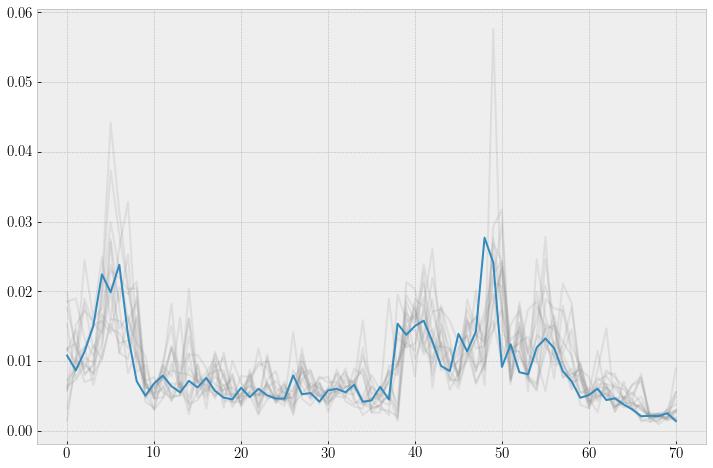

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(pd.DataFrame(test_sim_list).T,color="grey",alpha=.15)
ax.plot(obs_sim_data)

In [ ]:
x = np.linspace(.95*min(obs_sim_data),1.05*max(obs_sim_data),100000)

plt.plot(x,afd_gamma(xbar,beta).pdf(x),lw=5)
plt.hist(obs_sim_data,density=True);

In [ ]:
df_test_sim = pd.DataFrame(test_sim_list,columns=timepoints)

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
df_test_sim.T.plot(legend=None,color="b",alpha=.1,ax=ax)
ax.plot(timepoints,obs_sim_data,color="r")

In [ ]:
props = 1*(df_test_sim > obs_sim_data).T.mean()

In [ ]:
a,b,loc,scale = beta_stat.fit(props.values,floc=0,fscale=1)

In [ ]:
sums_list = []
for i in range(Mt)[::M]:
    sums = 1+1*(df_test_sim.iloc[i:i+M-1] > obs_sim_data).sum()
    sums_list.append(sums)

In [ ]:
Qt = []

for s in sums_list:
    n = plt.hist(s,bins=range(1,M+3))
    plt.close()
    
    q=sum(((Nt-1)/(M+1) - n[0])**2)/((Nt-1)/(M+1))
    Qt.append(q)in
    
1 - stats.chi2.cdf(np.median(Qt),df = Mt-M)

In [ ]:
1 - stats.chi2.cdf(np.median(Qt),df = .4*Mt)

In [ ]:
stats.chi2.pdf(np.linspace(200,300,100000),df= .4*Mt)

In [ ]:
x = np.linspace(200,350,1000)
plt.plot(x,stats.chi2.pdf(x,df= .38*Mt))
plt.hist(Qt,bins=20,density=True);

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(timepoints,test_sim_list[5],label="test")
ax.plot(timepoints,obs_sim_data,".-",label="observed")
fig.legend()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
i=1
for X in X_list:
    if X[i][-1] < obs_sim_data[i+1]:
        
        ax.plot(X[i],alpha=.2,color="b")
        
    else:
        
        ax.plot(X[i],alpha=.2,color="g")
                
ax.scatter([0,len(X[i])],[obs_sim_data[i],obs_sim_data[i+1]],c="r",zorder=10)

In [ ]:
x = np.linspace(0,1,10000)

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x,beta_stat.pdf(x,a,b),linewidth=5,alpha=.8)
ax.hist(props,density=True,bins=12)

#ax.set_xlim([.2,.8])